### Import data

In [1]:
include("importData.jl")
include("Hill.jl")
include("plot.jl")

# import G1, G2, and population data
conc, popl, g2l, g1l, g2_0l, g1_0l = setup_data("lapatinib");
conc_l = append!([0.01], conc[2:end]);

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:29
└ @ Main /home/farnazm/eh/DrugResponseModel.jl/src/importData.jl:29
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:37
└ @ Main /home/farnazm/eh/DrugResponseModel.jl/src/importData.jl:37


### Hill model, residual functions and optimization

In [2]:
#  [EC50, b_steepness, alpha_min, alpha_max, beta_min, beta_max, tau1_mean, tau1_max, tau2_min, tau2_max, gamma1_max, gamma2_max]
# guess
guess = [10.0, 1.0, 0.00682578, 0.00958013, 0.00503788, 0.0933964, 38.941, 9.94827, 0.00294624, 0.0422821, 0.02, 0.008, 10.0, 10.0]
# max num of steps
num_steps=7000

best_fit, params = optimize_hill(guess, conc_l, g1l, g2l, g1_0l, g2_0l, num_steps)

Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
100.05 secs, 653 evals, 530 steps, improv/step: 0.343 (last = 0.3434), fitness=32869.552416083
200.11 secs, 1313 evals, 1190 steps, improv/step: 0.276 (last = 0.2212), fitness=25930.512591101
300.23 secs, 1972 evals, 1849 steps, improv/step: 0.245 (last = 0.1897), fitness=19881.600075630
400.27 secs, 2631 evals, 2508 steps, improv/step: 0.236 (last = 0.2124), fitness=19881.600075630
500.34 secs, 3321 evals, 3199 steps, improv/step: 0.230 (last = 0.2084), fitness=18110.313106825
600.35 secs, 4013 evals, 3891 steps, improv/step: 0.229 (last = 0.2225), fitness=16988.414519552
700.39 secs, 4705 evals, 4583 steps, improv/step: 0.226 (last = 0.2081), fitness=16146.476849423
800.52 secs, 5400 evals, 5278 steps, improv/step: 0.225 (last = 0.2201), fitness=15528.722613406
900.55 secs, 6094 evals, 

(15243.89167115366, [13.988275774996945, 1.019093914348439, 0.010699004834267624, 0.06076655909386366, 0.034437194326157376, 0.025723779075466607, 30.666193997892858, 12.98132130818051, 14.830167633837549, 5.675669263333898, 0.0056046145560448585, 4.047236842382352e-5, 13.185930059207115, 12.407285142001788])

In [3]:
pars=getDDEparams(params, conc_l)

6×8 Array{Float64,2}:
  0.0607354    0.0477726    0.0399728   …   0.013217     0.0119739 
  0.0257292    0.0279852    0.0293426       0.033999     0.0342153 
 12.9923      17.571       20.3261         29.7768      30.2159    
  5.68136      8.05151      9.47765        14.3698      14.5971    
  3.70316e-6   0.00152032   0.00240999      0.00533843   0.00547003
  2.84516e-8   1.14819e-5   1.8021e-5   …   3.86606e-5   3.95577e-5

### Plot the data with the new set of parameters for DDE

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = plotIt(::Array{Float64,1}, ::Int64, ::String, ::Bool, ::DataFrame, ::Array{Float64,2}, ::Array{Float64,2}, ::Array{Float64,1}, ::Array{Float64,1}) at plot.jl:29
└ @ Main /home/farnazm/eh/DrugResponseModel.jl/src/plot.jl:29
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = plotIt(::Array{Float64,1}, ::Int64, ::String, ::Symbol, ::DataFrame, ::Array{Float64,2}, ::Array{Float64,2}, ::Array{Float64,1}, ::Array{Float64,1}) at plot.jl:29
└ @ Main /home/farnazm/eh/DrugResponseModel.jl/src/plot.jl:29


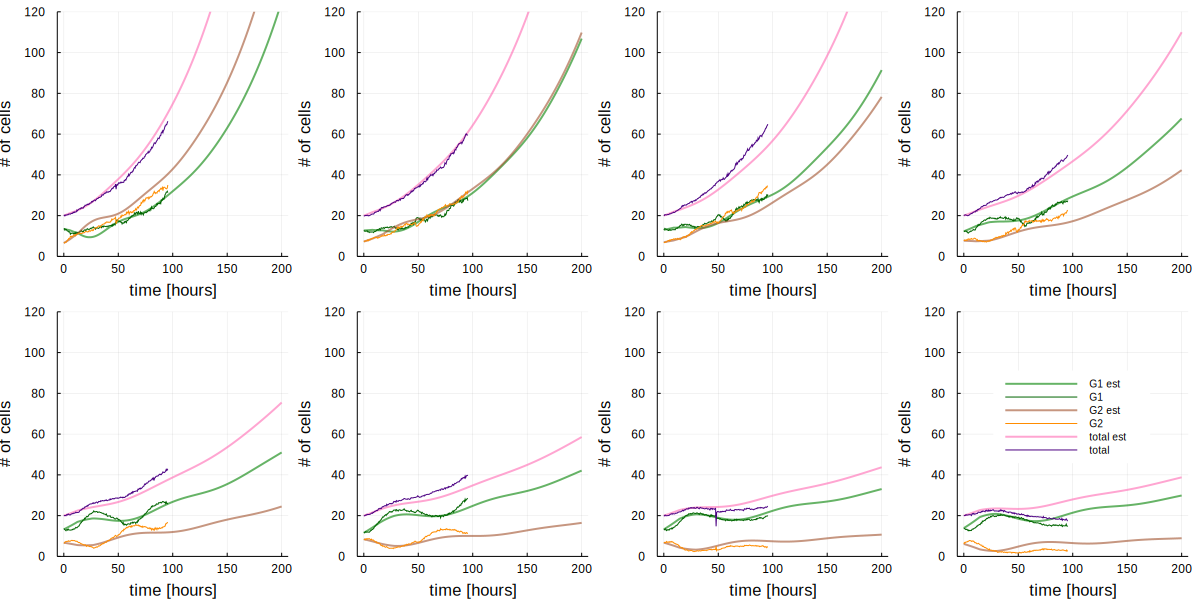

In [4]:
plot_all(pars, popl, g2l, g1l, g2_0l, g1_0l)

### Plot Hill curve for all of the DDE model parameters

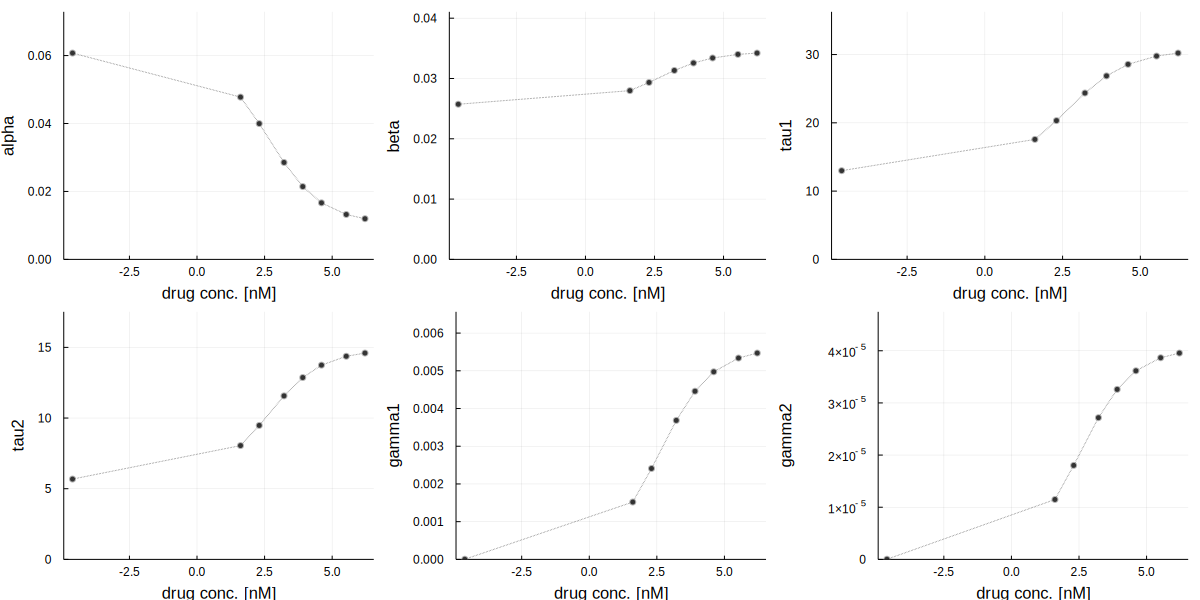

In [5]:
plot_parameters(conc_l, pars)